[110.5788004  105.06104522  97.96347472  52.77021503  34.57441891
  43.40003553  22.11924952  74.85912066  18.46341457  42.95471854
  51.70689373  31.52640876  42.15154461  72.45943651  70.17700746
  41.28697262  36.52612208  48.11787676  68.72919923  38.5305245
  88.3788214   69.82677112  38.97062415  36.6884703   34.01411127
  62.97395719  66.61735577  52.50611958  61.80852616  42.14694128
  15.11571662  45.3012169   48.67733836  69.86175569]
[ 57.4909785  105.99836754  61.92453388  43.11984565  63.70373292
  55.82987191 101.37383912  54.07351921  64.90894466 105.91265102
 124.93481903  50.81093117  77.26238339  95.59937757 118.30838647
  95.84178478 110.14274411  82.44840593  78.51233589  73.08747961
  86.37126271  92.67179179  36.27403442  78.63601194  97.00597861
  59.81032593 124.78465918  69.62204747  70.86918755  69.7826292
  38.87305963  56.81501516  78.54744654  63.48772253  38.70189316
 165.59566876 156.38717252 142.22324049 152.70774322 117.38675714
  59.13318191  52.830823

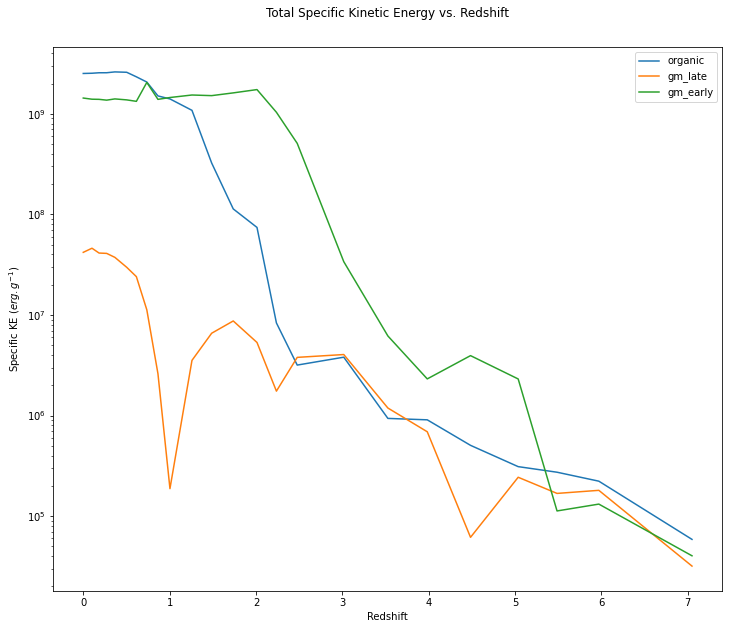

In [3]:
import h5py
import matplotlib.pyplot as plt
from os import listdir
import matplotlib.gridspec as gridspec
import numpy as np
import re

# axis scale sets the maximum value on the axes
axisScale = 0.03

datasets = ['organic', 'gm_late', 'gm_early']
datasetNo = 0

# define storage arrays and reshape to hold all three galaxy type data
redshifts = np.array(range(3*24), dtype=float)
redshifts.shape = (3, 24)
specificKes = np.array(range(3*24), dtype=float)
specificKes.shape = (3, 24)

for dataset in datasets:
   
   files = listdir('data/' + dataset)

   count = 0
   
   for file in files:
      
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift = float(s)

        # load data for a particular galaxy at a particular redshift
        f = h5py.File('data/' + dataset + '/' + file,'r')

        # extract data from the file
        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']

        # Get magnitudes of the vectors
        vel_magnitude = np.linalg.norm(ds_v, axis=1)
        print(vel_magnitude)

        # Calculate kinetic energy for all star particles
        specificKe = np.sum(0.5 * np.square(vel_magnitude))

        # Store values for plotting later
        redshifts[datasetNo, count] = redshift
        specificKes[datasetNo, count] = specificKe

        # Next redshift value
        count = count + 1

   # Next galaxy
   datasetNo = datasetNo + 1

plt.figure(figsize = (12,10))
plt.title('Total Specific Kinetic Energy vs. Redshift', pad=30)
plt.xlabel('Redshift')
plt.ylabel('Specific KE ($erg.g^{-1}$)')
plt.ticklabel_format(axis='y', style='sci', useMathText=True)
plt.semilogy()
for i in range(0,3):
   plt.plot(redshifts[i,0:], specificKes[i,0:])
plt.legend(['organic', 'gm_late', 'gm_early'])
plt.show()   

